# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np

from types import SimpleNamespace
from scipy import optimize
from scipy.optimize import minimize
import pandas as pd 
import matplotlib.pyplot as plt
import math

#We immport autoreload modules when code is run, to make sure our notebook has the recent changes from the Python file. 
%load_ext autoreload
%autoreload 2

#We import our python file, where we have set up our model.
import inauguralproject

#We import our class and name it "model".
from inauguralproject import HouseholdClass 
model = HouseholdClass()


In [ ]:
res = model.estimate()
res

# Question 1

In question 1, we want to solve the model discretely, and illustrate how the relative hours worked at home for men and women $\frac{H_F}{H_M}$ change for different values of $\alpha$ and $\sigma$. 

Based on the provided code, we alter the definition of consumption of home goods H in inauguralproject.py, to allow for $\sigma\neq1$. 

Following this, we solve the model discretely, and find the intial optimal working hours for men and women, in the the market and at home for $\alpha=0.5$ and $\sigma=1$

In [2]:
#We solve the discrete model for the initial values of sigma and alpha
model.par.alpha = 0.5
model.par.sigma = 1
disc = model.solve_discrete()

#Printing the results
print(f'The initial optimal hours working at home for women is HF = {disc.HF:.1f}' '\n'f'The initial optimal hours working at home for men is HM = {disc.HM:.1f}''\n'f'The initial optimal hours working at the market for women is LF = {disc.LF:.1f}' '\n'f'The initial optimal hours working at the market for men is LM = {disc.LM:.1f}' )


/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:73: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


The initial optimal hours working at home for women is HF = 4.5
The initial optimal hours working at home for men is HM = 4.5
The initial optimal hours working at the market for women is LF = 4.5
The initial optimal hours working at the market for men is LM = 4.5


In the following, we show how relative optimal working hours at home between men and women change dependent on different values of $\sigma$ and $\alpha$. We illustrate this in a table. 

____

In [3]:
#We unpack the model parameters
par = model.par

#We define vectors with the values of alpha and sigma.
alpha_vec = [0.25,0.5,0.75]
sigma_vec = [0.5,1,1.5]

#We create a table with the logarithm of the relative hours worked at home for men and women. 
def print_table():
    
    #We define an empty text string
    text = ''
    
    # Creating the top header of the table, we loop over the different values of sigma in the vector
    text += f'{"Alpha/Sigma":3s}'
    for j, sigma in enumerate(sigma_vec): 
       model.par.sigma=sigma
       text += f'{sigma:8.2f}' 
    text += '\n' + "-"*40 + "\n" #We create a line shift and a line to divide the header from the rest of the table. 
    
    # Creating the body of the table. We loop over the different values of alpha in the vector and fill the table with the optimal relative at home working hours defined as "initial"
    for i, alpha in enumerate(alpha_vec): 
        model.par.alpha=alpha
        if i > 0:
            text += '\n' #We create a line shift
        text += f'{alpha:8.2f}    |' #Creating the left header with a line to divide it from the rest of the table. 
        for j, sigma in enumerate(sigma_vec):
            model.par.sigma=sigma
            disc = model.solve_discrete()
            text += f'{disc.HF/disc.HM:7.2f}' 
    
    # Print
    print(text)

#We print the table: 
print_table()

/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:69: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:69: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Alpha/Sigma    0.50    1.00    1.50
----------------------------------------
    0.25    |   0.55   0.31   0.21
    0.50    |   1.00   1.00   1.00
    0.75    |   1.83   3.25   4.67


/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:69: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:69: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:73: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


Text(0.5, 0, 'HF/HM')

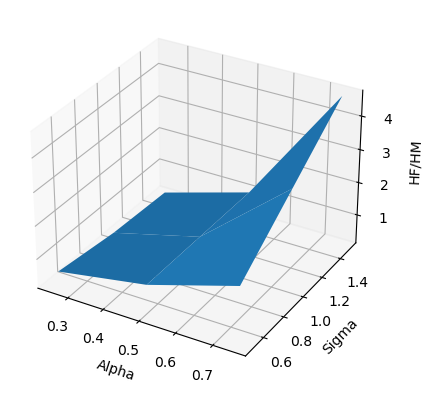

In [51]:
# We create a 2D grid of alpha and sigma
alpha_grid, sigma_grid = np.meshgrid(alpha_vec,sigma_vec)

# We want to create a matrix of HF/HM and loop through the grids of alpha and sigma. 
relative_hours= np.zeros([3,3])
for i in range(alpha_grid.shape[0]):
    for j in range(sigma_grid.shape[0]):
        model.par.alpha = alpha_grid[i,j]
        model.par.sigma = sigma_grid[i,j]
        disc = model.solve_discrete()
        relative_hours[i,j] = disc.HF/disc.HM

# We create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alpha_grid,sigma_grid,relative_hours)

ax.set_xlabel("Alpha")
ax.set_ylabel("Sigma")
ax.set_zlabel("HF/HM")

# Question 2

We now return to $\alpha=0.5$ and $\sigma=1$. 
We vary the female wage $w_F$ and illustrate how it changes $log\frac{H_F}{H_M}$ and $log\frac{w_F}{w_M}$.

In [ ]:
#We initiate a new model
model2 = HouseholdClass()

#We unpack the model parameters
par = model2.par

#We construct a list to hold the log value of the relative hours between men and women
log_rel_hours_list=[]

#We run a loop over the model where we change women's wage for each iteration
for wage in par.wF_vec:
    par.wF = wage
    opt = model2.solve_discrete()    

    #We calculate the model results for each iteration
    rel_hours = opt.HF/opt.HM
    log_rel_hours = np.log(rel_hours)

    log_rel_wage = np.log(par.wF_vec)

    #We append the results to our list of log values
    log_rel_hours_list = np.append(log_rel_hours_list, log_rel_hours)
 
    #We print our results
    print(f'When womens wage is {wage:.1f} and mens wage is wM = {par.wM:.1f}, the optimal working hours at home are {opt.HF:.1f} for women and {opt.HM:.1f} for men. Thus, their relative working hours are {rel_hours:.3f}. Taking the log of this fraction, we find log(HF/HM) = {log_rel_hours:.3f}.''\n')

In [ ]:
#We define the log of relative wages
log_rel_wage_list=np.log(par.wF_vec/par.wM)

#Plot log(HF/HM) against log(wF/wM() for the vector of female wages.
plt.scatter(log_rel_wage_list,log_rel_hours_list)
plt.title('Relative working hours in home given relative wages')
plt.xlabel('log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.grid()

#for i in range(par.wF_vec):
    #plt.text(log_rel_wage_list[i], log_rel_hours_list[i], f"wF={par.wF_vec[i]}")
plt.show()

# Question 3

Now, the model is continuous.
We vary the female wage $w_F$ and illustrate how it changes $log\frac{H_F}{H_M}$ and $log\frac{w_F}{w_M}$.

In [ ]:
#We refer to the class
model_cont = HouseholdClass() 

#We define the continuous solution
cont = model_cont.solve_continuous()

In [ ]:
#We print the results of the continuous model
print(f'The initial optimal hours working at home for women is HF = {cont.HF:.2f}' '\n'f'The initial optimal hours working at home for men is HM = {cont.HM:.2f}''\n'f'The initial optimal hours working at the market for women is LF = {cont.LF:.2f}' '\n'f'The initial optimal hours working at the market for men is LM = {cont.LM:.2f}' )

In [ ]:
# Using the model to calculate optimal HF and HM
model_cont = HouseholdClass()

# We unpack the model parameters
par = model_cont.par
sol = model_cont.sol

# We create an empty list
log_rel_hours_cont_list=[]

# Looping over wF values
for wage in par.wF_vec:
    
    # Setting value
    par.wF = wage

    # Solving for continuous optimal choice
    opt_cont = model_cont.solve_continuous()

    # We create log(HM/HF)
    rel_hours_cont = opt_cont.HF/opt_cont.HM
    log_rel_hours_cont = np.log(rel_hours_cont)

    # We create log(wF/wM)
    log_rel_wage = np.log(par.wF_vec)

    #We append the results to the empty list
    log_rel_hours_cont_list = np.append(log_rel_hours_cont_list, log_rel_hours_cont)

    #Append results to vectors of solutions
    sol.LM_vec = np.append(sol.LM_vec, opt_cont.LM)
    sol.HM_vec = np.append(sol.HM_vec, opt_cont.HM)
    sol.LF_vec = np.append(sol.LF_vec, opt_cont.LF)
    sol.HF_vec = np.append(sol.LF_vec, opt_cont.HF)

    #We print our results
    print(f'When womens wage is {wage:.2f} and mens wage is wM = {par.wM:.2f}, the optimal working hours at home are {opt_cont.HF:.2f} for women and {opt_cont.HM:.2f} for men. Thus, their relative working hours are {rel_hours_cont:.3f}. Taking the log of this fraction, we find log(HF/HM) = {log_rel_hours_cont:.3f}.''\n')


In [ ]:
#We plot the results
#We define the log of relative wages
log_rel_wage_cont_list=np.log(par.wF_vec/par.wM)

plt.scatter(log_rel_wage,log_rel_hours_cont_list)
plt.title('Relative working hours in home given relative wages')
plt.xlabel('log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.grid()

# Question 4


We solve the continuous model for each value of the female wage $w_F$.

In [ ]:
model_cont = HouseholdClass()
model.solve_wF_vec(discrete=False)
model_cont.sol

In [ ]:
model.par.alpha = 0.5
model.par.sigma = 1

In [ ]:
#Solve continuous model for each value of female wage
model.solve_wF_vec(discrete=False)
model.run_regression()
model.sol

In [ ]:
model.estimate()

In [ ]:
model.sol.LM_vec

Now, we run the proposed regression on our data and find $\hat\beta_0$ and $\hat\beta_1$.

In [ ]:
#Run regression on our data from the continuous model
model.run_regression()

#Print beta0 and beta1
model.sol

Finally, we minimise the squared differences of the artice's beta's and our model beta's, by varying sigma and alpha.

In [ ]:
model.estimate()
